## Analyzing Mercedes-Benz Prices in the USA: Trends and Insights USA Mercedes Benz Prices Analysis¶
## Introduction
### About This Notebook
This notebook explores the prices of Mercedes-Benz cars in the USA, providing insights into pricing trends and vehicle characteristics. The analysis responds to a client's inquiry, focusing on minimum and maximum prices, as well as mileage variations.

### Background
Understanding the pricing dynamics of luxury car brands like Mercedes-Benz is crucial in the evolving automotive industry. This notebook examines a dataset with information on various Mercedes-Benz models, including mileage, ratings, review counts, prices, and model years.

### Objective¶
The primary goals of this analysis are to address the following client questions:

Minimum Price of a Car: Identify the least expensive Mercedes-Benz car in the dataset.
Maximum Price of a Car: Identify the most expensive Mercedes-Benz car in the dataset.
Minimum Mileage Car: Identify the Mercedes-Benz car with the lowest mileage.
Maximum Mileage Car: Identify the Mercedes-Benz car with the highest mileage.
### Aim of the Notebook
By the end of this notebook, My aim is to provide valuable insights into the pricing and mileage characteristics of Mercedes-Benz cars, enabling client to make informed decisions regarding their automotive needs in the USA market.

## Import Packages:

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/usa-mercedes-benz-prices-dataset/usa_mercedes_benz_prices.csv


## Dataset Laoding:¶¶
Read Dataset:

In [2]:
df = pd.read_csv('/kaggle/input/usa-mercedes-benz-prices-dataset/usa_mercedes_benz_prices.csv')

Check Head and Info:¶

In [3]:
df.head()

,Name,Mileage,Rating,Review Count,Price
0,2021 Mercedes-Benz A-Class A 220 4MATIC,"29,636 mi.",3.9,"1,800","$30,900"
1,2022 Mercedes-Benz AMG SL 63 Base,"5,540 mi.",4.7,"1,239","$139,999"
2,2022 Mercedes-Benz AMG SL 63 Base,"4,890 mi.",4.7,"1,239","$132,999"
3,2020 Mercedes-Benz AMG E 53 Base 4MATIC,"29,746 mi.",4.8,752,"$58,587"
4,2021 Mercedes-Benz AMG GLS 63 Base 4MATIC,"32,631 mi.",5.0,"1,502","$95,990"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429 entries, 0 to 2428
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          2429 non-null   object 
 1   Mileage       2429 non-null   object 
 2   Rating        2135 non-null   float64
 3   Review Count  2398 non-null   object 
 4   Price         2429 non-null   object 
dtypes: float64(1), object(4)
memory usage: 95.0+ KB


## Data Cleaning:¶¶
Remove Unwanted Letters:
I want to remove something which is apperaing with any cloumn

In [5]:
# Remove 'mi.' from Mileage column
df['Mileage'] = df['Mileage'].str.replace(' mi.', '')

In [6]:
df.head()

,Name,Mileage,Rating,Review Count,Price
0,2021 Mercedes-Benz A-Class A 220 4MATIC,"29,636",3.9,"1,800","$30,900"
1,2022 Mercedes-Benz AMG SL 63 Base,"5,540",4.7,"1,239","$139,999"
2,2022 Mercedes-Benz AMG SL 63 Base,"4,890",4.7,"1,239","$132,999"
3,2020 Mercedes-Benz AMG E 53 Base 4MATIC,"29,746",4.8,752,"$58,587"
4,2021 Mercedes-Benz AMG GLS 63 Base 4MATIC,"32,631",5.0,"1,502","$95,990"


In [7]:
# Remove '$.' from Price column
df['Price'] = df['Price'].str.replace('$', '')

In [8]:
df.head()

,Name,Mileage,Rating,Review Count,Price
0,2021 Mercedes-Benz A-Class A 220 4MATIC,"29,636",3.9,"1,800","30,900"
1,2022 Mercedes-Benz AMG SL 63 Base,"5,540",4.7,"1,239","139,999"
2,2022 Mercedes-Benz AMG SL 63 Base,"4,890",4.7,"1,239","132,999"
3,2020 Mercedes-Benz AMG E 53 Base 4MATIC,"29,746",4.8,752,"58,587"
4,2021 Mercedes-Benz AMG GLS 63 Base 4MATIC,"32,631",5.0,"1,502","95,990"


## Rename column:
I want to add miles with mileage for better understanding and dollar sign with price

In [9]:
df.rename(columns={'Mileage': 'Mileage (miles)'}, inplace=True)

In [10]:
df.rename(columns={'Price': 'Price (US$)'}, inplace=True)

In [11]:
df.head()

,Name,Mileage (miles),Rating,Review Count,Price (US$)
0,2021 Mercedes-Benz A-Class A 220 4MATIC,"29,636",3.9,"1,800","30,900"
1,2022 Mercedes-Benz AMG SL 63 Base,"5,540",4.7,"1,239","139,999"
2,2022 Mercedes-Benz AMG SL 63 Base,"4,890",4.7,"1,239","132,999"
3,2020 Mercedes-Benz AMG E 53 Base 4MATIC,"29,746",4.8,752,"58,587"
4,2021 Mercedes-Benz AMG GLS 63 Base 4MATIC,"32,631",5.0,"1,502","95,990"


## Make Model Year column:¶
Adding column for Model year

In [12]:
# Extracting model year from the 'Name' column
df['Model Year'] = df['Name'].str.extract(r'(\d{4})')

In [13]:
df.head()

,Name,Mileage (miles),Rating,Review Count,Price (US$),Model Year
0,2021 Mercedes-Benz A-Class A 220 4MATIC,"29,636",3.9,"1,800","30,900",2021
1,2022 Mercedes-Benz AMG SL 63 Base,"5,540",4.7,"1,239","139,999",2022
2,2022 Mercedes-Benz AMG SL 63 Base,"4,890",4.7,"1,239","132,999",2022
3,2020 Mercedes-Benz AMG E 53 Base 4MATIC,"29,746",4.8,752,"58,587",2020
4,2021 Mercedes-Benz AMG GLS 63 Base 4MATIC,"32,631",5.0,"1,502","95,990",2021


## Remove year from Name:¶¶
I added a model year column, so I don't want the model year to be included with the model name.

In [14]:
df['Name'] = df['Name'].apply(lambda x: re.sub(r'\b\d{4}\b\s*', '', x).strip())
df.head()

,Name,Mileage (miles),Rating,Review Count,Price (US$),Model Year
0,Mercedes-Benz A-Class A 220 4MATIC,"29,636",3.9,"1,800","30,900",2021
1,Mercedes-Benz AMG SL 63 Base,"5,540",4.7,"1,239","139,999",2022
2,Mercedes-Benz AMG SL 63 Base,"4,890",4.7,"1,239","132,999",2022
3,Mercedes-Benz AMG E 53 Base 4MATIC,"29,746",4.8,752,"58,587",2020
4,Mercedes-Benz AMG GLS 63 Base 4MATIC,"32,631",5.0,"1,502","95,990",2021


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429 entries, 0 to 2428
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2429 non-null   object 
 1   Mileage (miles)  2429 non-null   object 
 2   Rating           2135 non-null   float64
 3   Review Count     2398 non-null   object 
 4   Price (US$)      2429 non-null   object 
 5   Model Year       2429 non-null   object 
dtypes: float64(1), object(5)
memory usage: 114.0+ KB


## Convert data type:

In [16]:
df['Mileage (miles)'] = df['Mileage (miles)'].str.replace(',', '')
df['Review Count'] = df['Review Count'].str.replace(',', '')
df['Price (US$)'] = df['Price (US$)'].replace(',', '')

## Convert year col to datetime type:¶¶
I wanna change date in proper date format YYYY/MM/DD

In [17]:
# Convert 'Model Year' to date format
df['Model Year'] = pd.to_datetime(df['Model Year'], format='%Y')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429 entries, 0 to 2428
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             2429 non-null   object        
 1   Mileage (miles)  2429 non-null   object        
 2   Rating           2135 non-null   float64       
 3   Review Count     2398 non-null   object        
 4   Price (US$)      2429 non-null   object        
 5   Model Year       2429 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 114.0+ KB


In [19]:
# Convert 'Mileage (miles)'
df['Mileage (miles)'] = df['Mileage (miles)'].astype(int)

In [20]:
# Convert 'Price (US$)' column to integer
df['Price (US$)'] = pd.to_numeric(df['Price (US$)'].replace('[$,]', '', regex=True), errors='coerce')

# Convert 'Review Count' column to integer
df['Review Count'] = pd.to_numeric(df['Review Count'], errors='coerce')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429 entries, 0 to 2428
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Name             2429 non-null   object        
 1   Mileage (miles)  2429 non-null   int64         
 2   Rating           2135 non-null   float64       
 3   Review Count     2398 non-null   float64       
 4   Price (US$)      2428 non-null   float64       
 5   Model Year       2429 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 114.0+ KB


## Check Null Values:
Checking null values in our data is neccessary procces in data analysis

In [22]:
df.isnull().sum()

Name                 0
Mileage (miles)      0
Rating             294
Review Count        31
Price (US$)          1
Model Year           0
dtype: int64

In [23]:
df.head()

,Name,Mileage (miles),Rating,Review Count,Price (US$),Model Year
0,Mercedes-Benz A-Class A 220 4MATIC,29636,3.9,1800.0,30900.0,2021-01-01
1,Mercedes-Benz AMG SL 63 Base,5540,4.7,1239.0,139999.0,2022-01-01
2,Mercedes-Benz AMG SL 63 Base,4890,4.7,1239.0,132999.0,2022-01-01
3,Mercedes-Benz AMG E 53 Base 4MATIC,29746,4.8,752.0,58587.0,2020-01-01
4,Mercedes-Benz AMG GLS 63 Base 4MATIC,32631,5.0,1502.0,95990.0,2021-01-01


## Check Numerical data Statistical Values:¶¶
df.describe() provides a concise statistical summary of the numerical columns in a DataFrame.

In [24]:
df.describe()

,Mileage (miles),Rating,Review Count,Price (US$),Model Year
count,2429.000000,2135.000000,2398.000000,2428.000000,2429
mean,20075.742692,4.533724,1267.143036,55994.378501,2021-10-09 01:55:36.187731712
min,100.000000,2.100000,0.000000,8999.000000,2014-01-01 00:00:00
25%,5845.000000,4.400000,344.000000,38000.000000,2021-01-01 00:00:00
50%,14013.000000,4.600000,919.000000,46925.500000,2022-01-01 00:00:00
75%,31191.000000,4.800000,1800.000000,62440.750000,2023-01-01 00:00:00
max,194043.000000,5.000000,7140.000000,229918.000000,2024-01-01 00:00:00
std,17800.944138,0.386506,1261.300025,31402.041807,NaN


## Data Visualization:¶
Data visualization uses charts, graphs, and maps to represent data visually, making complex information easier to understand and analyze.

/tmp/ipykernel_18/4066445605.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_n

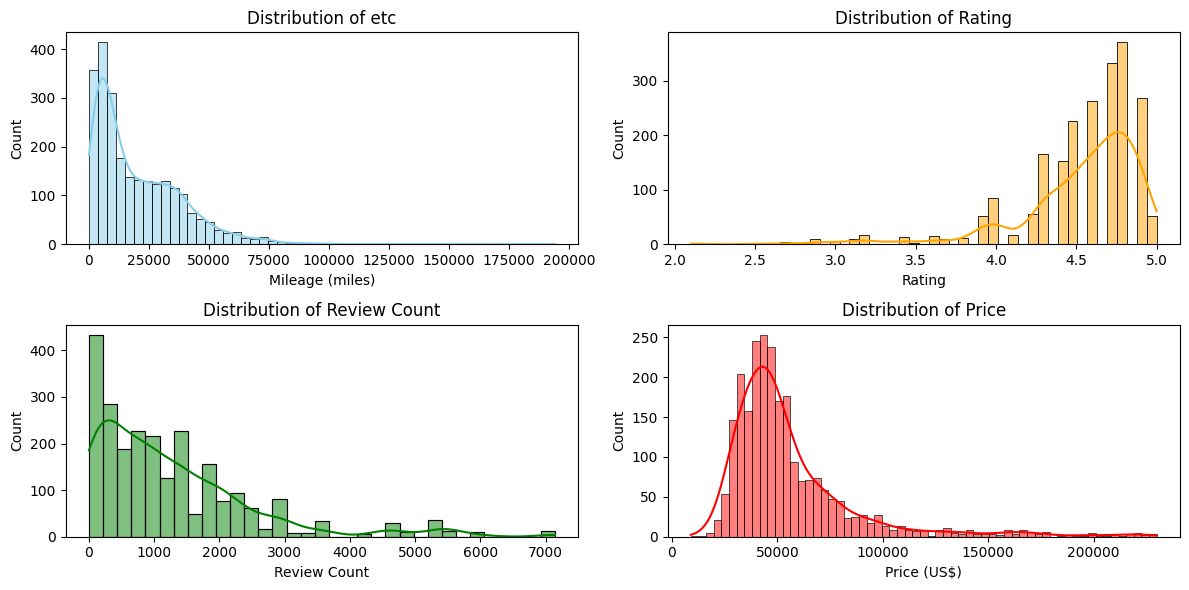

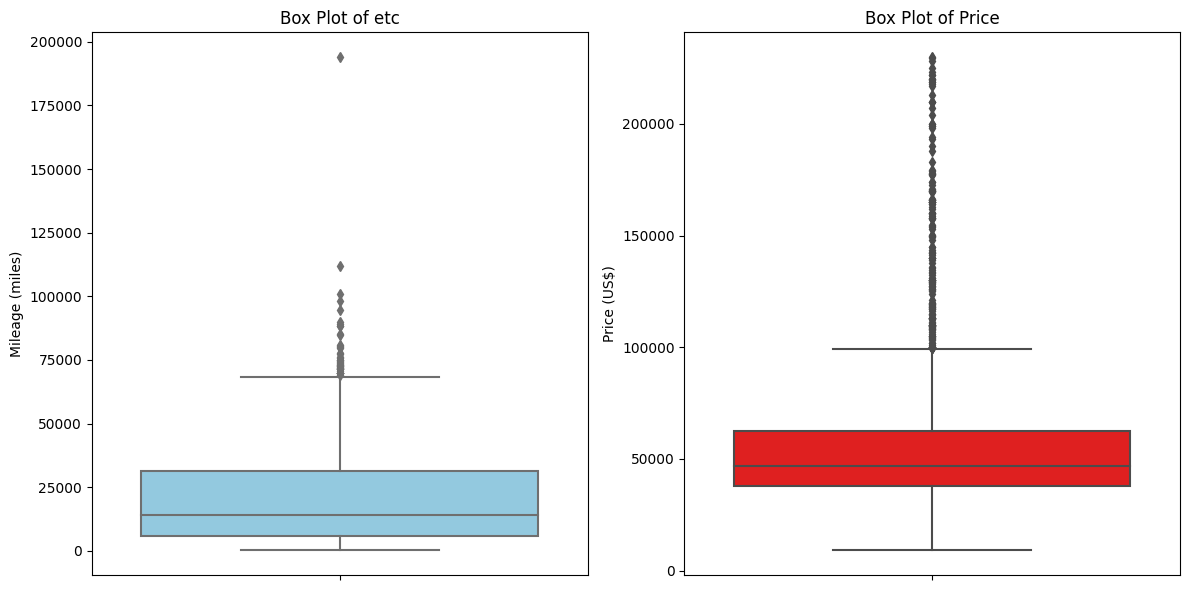

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


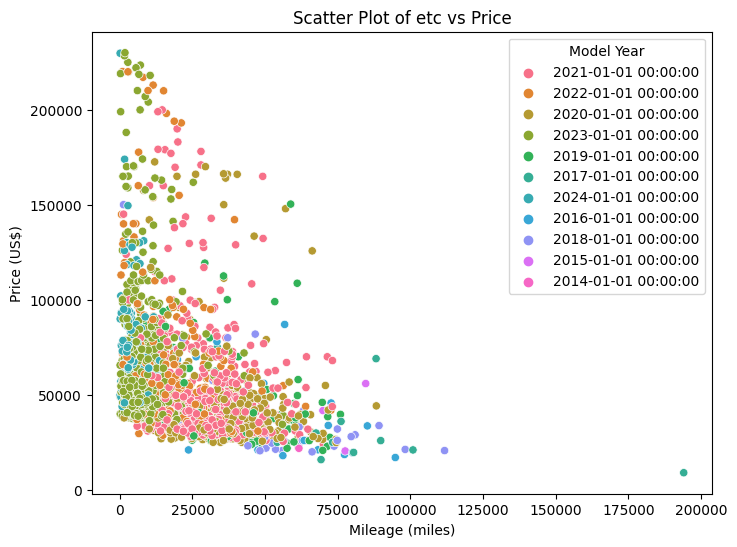

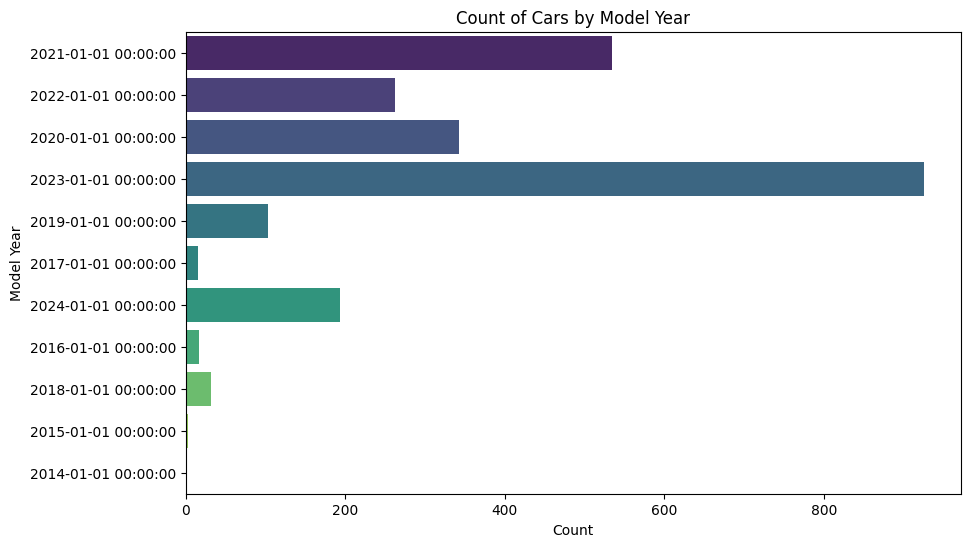

In [25]:
# Suppress FutureWarning about use_inf_as_na
pd.set_option('mode.use_inf_as_na', True)
# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['Mileage (miles)'], kde=True, color='skyblue')
plt.title('Distribution of etc')

plt.subplot(2, 2, 2)
sns.histplot(df['Rating'], kde=True, color='orange')
plt.title('Distribution of Rating')

plt.subplot(2, 2, 3)
sns.histplot(df['Review Count'], kde=True, color='green')
plt.title('Distribution of Review Count')

plt.subplot(2, 2, 4)
sns.histplot(df['Price (US$)'], kde=True, color='red')
plt.title('Distribution of Price')

plt.tight_layout()
plt.show()

# Box Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='Mileage (miles)', data=df, color='skyblue')
plt.title('Box Plot of etc')

plt.subplot(1, 2, 2)
sns.boxplot(y='Price (US$)', data=df, color='red')
plt.title('Box Plot of Price')

plt.tight_layout()
plt.show()

# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Mileage (miles)', y='Price (US$)', data=df, hue='Model Year')
plt.title('Scatter Plot of etc vs Price')
plt.show()

# Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(y='Model Year', data=df, palette='viridis')
plt.title('Count of Cars by Model Year')
plt.xlabel('Count')
plt.ylabel('Model Year')
plt.show()

## Client's Requirements :(hypothetical scenario)¶

In [26]:
# Find the row with the lowest mileage
lowest_mileage_index = df['Mileage (miles)'].idxmin()
lowest_mileage_car = df.loc[lowest_mileage_index]

# Display the car with the lowest mileage
print(lowest_mileage_car)
#This code finds and prints the details of the car with the lowest mileage in a DataFrame.

Name               Mercedes-Benz C-Class C 300 4MATIC
Mileage (miles)                                   100
Rating                                            4.7
Review Count                                   2308.0
Price (US$)                                   49777.0
Model Year                        2024-01-01 00:00:00
Name: 1261, dtype: object


In [27]:
# Find the row with the lowest mileage
highest_mileage_index = df['Mileage (miles)'].idxmax()
highest_mileage_car = df.loc[highest_mileage_index]

# Display the car with the lowest mileage
print(highest_mileage_car)

Name               Mercedes-Benz Metris Base
Mileage (miles)                       194043
Rating                                   4.3
Review Count                          1491.0
Price (US$)                           8999.0
Model Year               2017-01-01 00:00:00
Name: 526, dtype: object


In [28]:
# Find the row with the highest price
highest_price_index = df['Price (US$)'].idxmax()
highest_price_car = df.loc[highest_price_index]

# Display the car with the highest price
print(highest_price_car)

Name               Mercedes-Benz AMG G 63 4MATIC
Mileage (miles)                             1777
Rating                                       4.4
Review Count                              1038.0
Price (US$)                             229918.0
Model Year                   2023-01-01 00:00:00
Name: 2395, dtype: object


In [29]:
# Find the row with the lowest price
lowest_price_index = df['Price (US$)'].idxmin()
lowest_price_car = df.loc[lowest_price_index]

# Display the car with the lowest price
print(lowest_price_car)

Name               Mercedes-Benz Metris Base
Mileage (miles)                       194043
Rating                                   4.3
Review Count                          1491.0
Price (US$)                           8999.0
Model Year               2017-01-01 00:00:00
Name: 526, dtype: object


## Conclusion:

By the end of this notebook, I discovered that the dataset contains information on Mercedes-Benz cars in the USA:

Mileage (miles): The average mileage of the cars is around 20,076 miles, with the lowest being 100 miles and the highest 194,043 miles. The mileage varies widely, with an average difference from the mean of 17,801 miles.

Rating: The average rating of the cars is 4.53 out of 5, ranging from 2.1 to 5.0. Most cars have a high rating above 4.

Review Count: The average number of reviews for the cars is about 1,267, with the lowest being 0 reviews and the highest 7,140 reviews. The number of reviews varies greatly among the cars, with an average difference from the mean of 1,261.

-Price (US): The average price of the cars is  55,994,ranging from
 8,999 to  229,918.The prices show considerable variation,with an average difference from the mean of 31,402.

These statistics provide insights into the distribution and range of mileage, rating, review count, and price for Mercedes-Benz cars in the dataset.